<a href="https://colab.research.google.com/github/bollimuntha-shreya/Election-Classification/blob/main/Elections_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataframe

In [1]:
import pandas as pd
import io
import glob
import numpy as np
url = 'https://raw.githubusercontent.com/bollimuntha-shreya/Election-Classification/main/All_States_GE.csv'
data = pd.read_csv(url)


<ipython-input-1-3df087c899eb>:6: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


# Data Preprocessing

In [17]:
data_pre = data.copy()
data_pre = data_pre.loc[(data_pre['Candidate'] != 'NOTA') & (data_pre['Sex'] != 'NOTA')]
data_pre = data_pre.loc[(data_pre['Sex'] != 'O')]
# data_pre = data_pre.loc[data_pre['Position'] == 1]
# data_pre.head(20)

features = ['State_Name', 'Constituency_Type', 'Year', 'Turnout_Percentage', 'Party_Type_TCPD', 'Vote_Share_Percentage','Sex','Position','Constituency_No']

# Drop rows with missing values
data_pre = data_pre.dropna(subset=features)



# # Drop rows with missing values in 'Sex' column
# data_pre.dropna(subset=['Sex'], inplace=True)
# print(np.shape(data_pre))
# data_pre.dropna(subset=['Year'], inplace=True)
# print(np.shape(data_pre))
# # data_pre.dropna(subset=['month'], inplace=True)
# # print(np.shape(data_pre))
# # data_pre.dropna(subset=['Candidate_Type'], inplace=True)
# # print(np.shape(data_pre))
# data_pre.dropna(subset=['Turnout_Percentage'], inplace=True)
# print(np.shape(data_pre))
# data_pre.dropna(subset=['Constituency_Type'], inplace=True)
# print(np.shape(data_pre))
# data_pre.dropna(subset=['Votes'], inplace=True)
# print(np.shape(data_pre))
# data_pre.dropna(subset=['Position'], inplace=True)
# print(np.shape(data_pre))

## Converting strings to integers
# 'Sex'
Sex_mapping = {'M': 1,'MALE': 1, 'FEMALE': 0, 'F': 0, 'O':-1}
data_pre['Sex'] = list(map(Sex_mapping.get,data_pre['Sex']))

# 'Constituency_Type'
Con_Type_mapping = {'GEN': 0, 'SC': 1, 'ST': 2}
data_pre['Constituency_Type'] = list(map(Con_Type_mapping.get,data_pre['Constituency_Type']))




<ipython-input-17-6e892ccdc101>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Sex'] = list(map(Sex_mapping.get,data_pre['Sex']))
<ipython-input-17-6e892ccdc101>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Constituency_Type'] = list(map(Con_Type_mapping.get,data_pre['Constituency_Type']))


##Correlation Matrix

<Axes: >

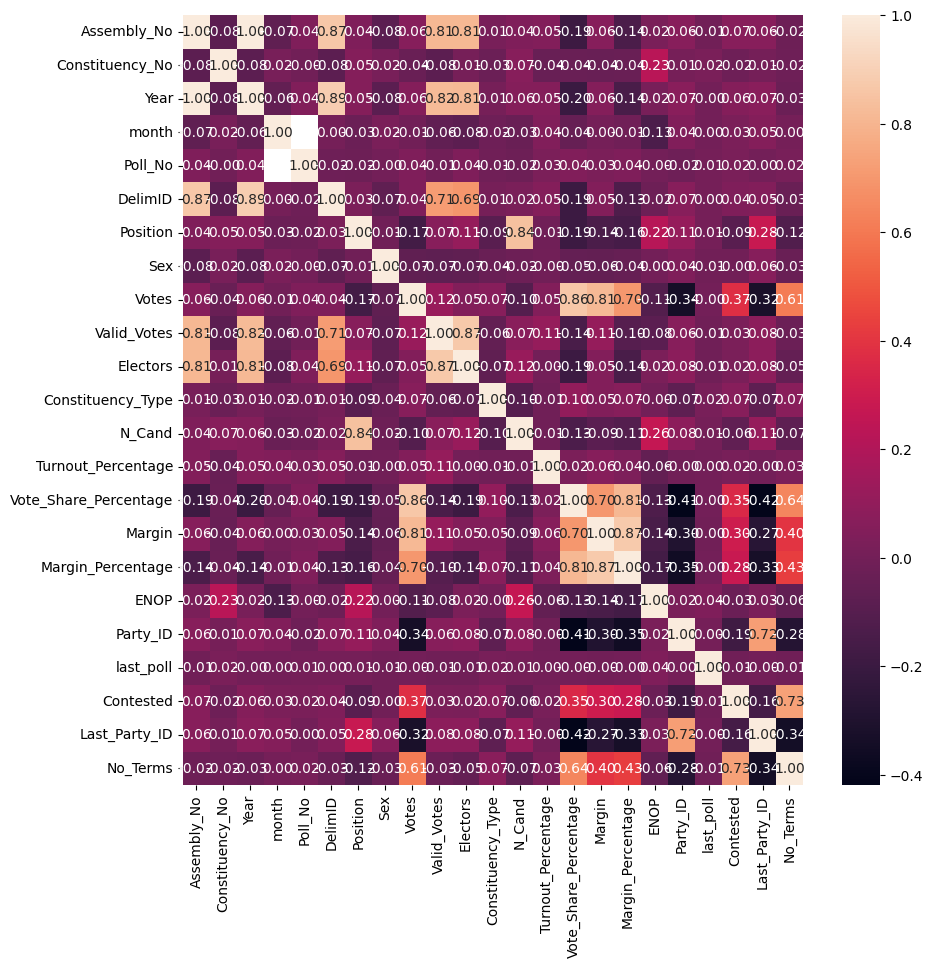

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = data_pre.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')

# Classification

Classsification Problem : Predicting the Election Winner's Gender

Data Split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Feature Selection: Select relevant features for the classification model
# X = data_pre[['Year', 'month', 'Party', 'Candidate_Type', 'Turnout_Percentage', 'Same_Constituency', 'Same_Party']]
# X = data_pre[['Year','Turnout_Percentage','Constituency_Type','Votes','Vote_Share_Percentage']]
features = ['State_Name', 'Constituency_Type', 'Year', 'Turnout_Percentage', 'Party_Type_TCPD', 'Vote_Share_Percentage','Position','Constituency_No']
X = data_pre[features]
Y = data_pre['Sex']


# categorical_features = ['State_Name', 'Party_Type_TCPD']
encoder = OneHotEncoder()
# Encode categorical features
label_encoder = LabelEncoder()
data_pre['State_Name'] = label_encoder.fit_transform(data_pre['State_Name'])
data_pre['Party_Type_TCPD'] = label_encoder.fit_transform(data_pre['Party_Type_TCPD'])

# X_test.fillna(X_train.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(np.shape(X))
X.head()


(88771, 8)


,State_Name,Constituency_Type,Year,Turnout_Percentage,Party_Type_TCPD,Vote_Share_Percentage,Position,Constituency_No
0,0,0,2019,65.09,2,45.98,1,1
1,0,0,2019,65.09,2,45.30,2,1
2,0,0,2019,65.09,0,2.58,3,1
3,0,0,2019,65.09,4,1.37,4,1
4,0,0,2019,65.09,4,1.20,5,1


1. Logistic Regression

In [52]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# classification report
print(classification_report(y_test, y_pred))


Accuracy of logistic regression classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       946
           1       0.95      1.00      0.97     16809

    accuracy                           0.95     17755
   macro avg       0.47      0.50      0.49     17755
weighted avg       0.90      0.95      0.92     17755



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Naive Bayes

In [28]:
 # # naive bayes
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# classification report
print(classification_report(y_test, y_pred))


Accuracy of naive bayes classifier on test set: 0.91
[[   79   867]
 [  670 16139]]
              precision    recall  f1-score   support

           0       0.11      0.08      0.09       946
           1       0.95      0.96      0.95     16809

    accuracy                           0.91     17755
   macro avg       0.53      0.52      0.52     17755
weighted avg       0.90      0.91      0.91     17755



3. k-Nearest Neighbors

In [29]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print('Accuracy of knn classifier on test set:{:.2f} '.format(knn.score(X_test, y_test)))
# classification report
print(classification_report(y_test, y_pred))

Accuracy of knn classifier on test set:0.94 
              precision    recall  f1-score   support

           0       0.11      0.08      0.09       946
           1       0.95      0.96      0.95     16809

    accuracy                           0.91     17755
   macro avg       0.53      0.52      0.52     17755
weighted avg       0.90      0.91      0.91     17755



4. Decision Tree

In [30]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

# confusion matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

# classification report
print(classification_report(y_test, y_pred))

Accuracy of decision tree classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.10      0.12      0.11       946
           1       0.95      0.94      0.95     16809

    accuracy                           0.90     17755
   macro avg       0.53      0.53      0.53     17755
weighted avg       0.90      0.90      0.90     17755



5. Random Forest

In [31]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# classification report
print(classification_report(y_test, y_pred))


Accuracy of random forest classifier on test set: 0.94
[[    9   937]
 [   66 16743]]
              precision    recall  f1-score   support

           0       0.12      0.01      0.02       946
           1       0.95      1.00      0.97     16809

    accuracy                           0.94     17755
   macro avg       0.53      0.50      0.49     17755
weighted avg       0.90      0.94      0.92     17755



### Insight 1

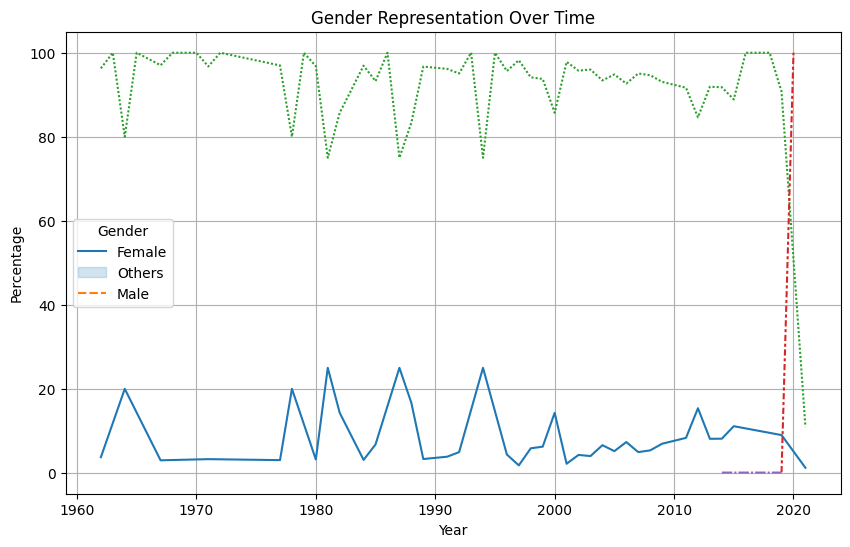

In [51]:
# # Insight 1: Gender Representation Over Time
# gender_counts = data['Sex'].value_counts(normalize=True)
# plt.figure(figsize=(6, 4))
# sns.barplot(x=gender_counts.index, y=gender_counts.values)
# plt.title("Gender Representation Over Time")
# plt.xlabel("Gender (0: Female, 1: Male, 2: Others)")
# plt.ylabel("Percentage")
# plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male','Others'])
# plt.show()
data_graph = data.copy()
data_graph = data_graph.loc[(data_graph['Candidate'] != 'NOTA') & (data_graph['Sex'] != 'NOTA')]

# Calculate the percentage of male and female candidates for each election year
gender_percentages = data_graph.groupby('Year')['Sex'].value_counts(normalize=True).unstack() * 100

# Plot the gensns.lineplot(data=gender_percentages, marker='o'der representation over time
plt.figure(figsize=(10, 6))
# sns.lineplot(data=gender_percentages, marker='o')
sns.lineplot(data=gender_percentages)
plt.title("Gender Representation Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Gender", labels=['Female','Others','Male'])
plt.grid(True)
plt.show()

### Insight 2


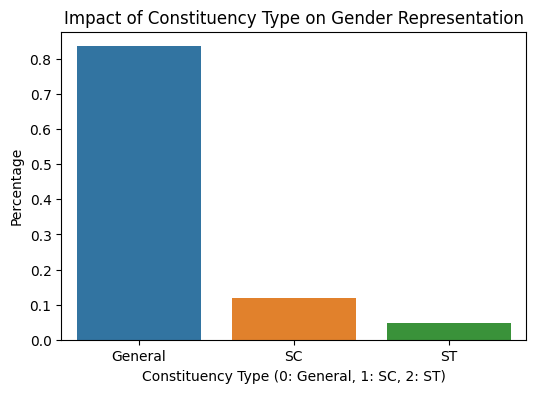

In [38]:
# Insight 2: Impact of Constituency Type on Gender Representation
constituency_type_counts = data['Constituency_Type'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=constituency_type_counts.index, y=constituency_type_counts.values)
plt.title("Impact of Constituency Type on Gender Representation")
plt.xlabel("Constituency Type (0: General, 1: SC, 2: ST)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2], labels=['General', 'SC', 'ST'])
plt.show()